## Desafio Banco do Brasil

In [51]:
# Imports Pandas e Numpy
import pandas as pd
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

# Import seaborn
import seaborn as sns

In [52]:
# Read csv
base = pd.read_csv('census.csv',delimiter=';')

In [53]:
# Mostra os 5 primeiros registros do dataset
base.head(5)  

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [54]:
# Verifica a quantidade de nulos 
base.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     0
income             1
dtype: int64

In [55]:
# Info para verificacao de tipos de colunas, quantidade e missings
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 14 columns):
age                5533 non-null int64
workclass          5533 non-null object
education_level    5533 non-null object
education-num      5533 non-null float64
marital-status     5533 non-null object
occupation         5533 non-null object
relationship       5533 non-null object
race               5533 non-null object
sex                5533 non-null object
capital-gain       5532 non-null float64
capital-loss       5532 non-null float64
hours-per-week     5532 non-null float64
native-country     5533 non-null object
income             5532 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 605.2+ KB


In [56]:
# Coloca a media nos missing capital loss
filtro = base['capital-loss'].isnull()
base.loc[filtro,'capital-loss'] = base['capital-loss'].mean()

In [57]:
# retira missing do income
df = pd.DataFrame(base['income'].value_counts())

filtro1 = base['income'].isnull()
base.loc[filtro,'income'] = df.index[0]

In [58]:
# Set default Seaborn style
sns.set()

/storage/anaconda3/envs/default-notebook/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


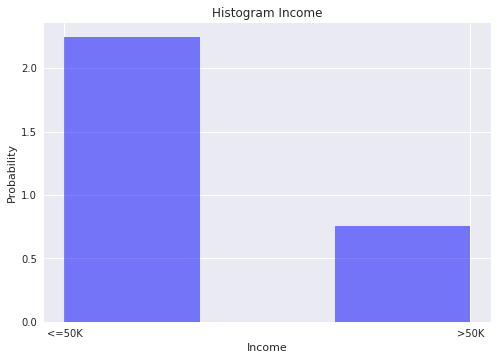

In [60]:
# Histograma de probabilidades
x = base['income'].values
num_bins = 3
# histograma
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
y = mlab.normpdf(bins, mu, sigma)
plt.xlabel('Income')
plt.ylabel('Probability')
plt.title(r'Histogram Income')
 
# show
plt.show()

In [8]:
# cria os previsores e a classe
previsores = base.iloc[:, 0:13].values
classe = base.iloc[:, -1].values

In [9]:
# transforma as variaveis para inteiros com o LabelEncode dos previsores
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_previsores = LabelEncoder()

previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 2] = labelencoder_previsores.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 4] = labelencoder_previsores.fit_transform(previsores[:, 4])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder_previsores.fit_transform(previsores[:, 11])
previsores[:, 12] = labelencoder_previsores.fit_transform(previsores[:, 12])

In [10]:
# OneHotEncoder classifica as colunas
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,4,5,6,7,8,9,11,12])
previsores = onehotencoder.fit_transform(previsores).toarray()

In [11]:
# transforma as variaveis para inteiros com o LabelEncode da classe (target)
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

In [12]:
# gera a curva de classificacao
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [13]:
# realiza o treinamento com 30% dos dados 
from sklearn.cross_validation import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.30, random_state=0)

/storage/anaconda3/envs/default-notebook/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Gaussian do treinamento para verificar se ele gera uma acuracia melhor
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [15]:
# realiza a matriz de confusao e gera a acuracia
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [16]:
# imprimi a precisao de acuracia e verifica que nao foi bom desempenho
print('Precisão Acuracia Naive Bayes')
print(precisao)

Precisão Acuracia Naive Bayes
0.322891566265


In [17]:
# classificacao de arvore de decisao para verificar se resulta melhor acuracia 
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [18]:
# realiza a matriz de confusao e gera a acuracia
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [19]:
# imprimi o resultado e verifica melhor acuracia
print('Precisão Acuracia Random Forest')
print(precisao)

Precisão Acuracia Random Forest
0.828313253012


In [20]:
# separa os maiores que 50 para gerar a probabilidade
maiores_50 = base[base.income==">50K"].income.count()
num_reg    = base.count()

probabilidade = maiores_50/num_reg

In [21]:
# Calcula o log loss
perda_precisao = 1e-14
predicao = np.clip(precisao, perda_precisao, 1-perda_precisao)
loss = -1 * np.mean(probabilidade * np.log(predicao) + (1-probabilidade) * np.log(1-predicao))


In [22]:
# imprimi o log loss
print('Perda de Log')
print(loss)

Perda de Log
1.36587037492
